# Logistic Regresstion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data_path = './kyowon-master/datasets/'
df = pd.read_csv(data_path + 'Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
# astype() 기억할것
X = df.iloc[:, [2,3]].values.astype('float32')
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [6]:
y = df.iloc[:, 4].values.astype('float32')
y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [8]:
# 정규화
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
print(X_train[0], X_train_scaled[0])

[5.80e+01 1.44e+05] [1.92295   2.1460156]


In [9]:
# fit_transform 대신에 transform만 쓰면 기존에 계산한 평균과 표준편차로 정규화 진행(trainset의 평균과 표준편차)
X_test_scaled = sc.transform(X_test)
print(X_test[0], X_test_scaled[0])

[3.0e+01 8.7e+04] [-0.79895085  0.4946076 ]


In [10]:
# hyper parameter 전부 출력
from sklearn import set_config
set_config(print_changed_only = False)

lr = LogisticRegression(solver = 'lbfgs', random_state = 0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
print(accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), '\n', 
      confusion_matrix(y_test, y_pred))

0.925 0.7727272727272727 0.9444444444444444 0.85 
 [[57  1]
 [ 5 17]]


In [13]:
# 0의 비율
sum(y_test == 0)/len(y_test)

0.725

## threshold 조정

In [14]:
# 확률 출력
lr.predict_proba(X_test_scaled)

array([[0.87397564, 0.12602436],
       [0.82308938, 0.17691062],
       [0.7922792 , 0.2077208 ],
       [0.89908522, 0.10091478],
       [0.89298557, 0.10701443],
       [0.99023273, 0.00976727],
       [0.98195302, 0.01804698],
       [0.26565508, 0.73434492],
       [0.99237235, 0.00762765],
       [0.50101724, 0.49898276],
       [0.95797539, 0.04202461],
       [0.96538137, 0.03461863],
       [0.82857641, 0.17142359],
       [0.62179463, 0.37820537],
       [0.98045278, 0.01954722],
       [0.64740549, 0.35259451],
       [0.70819428, 0.29180572],
       [0.98434561, 0.01565439],
       [0.01367777, 0.98632223],
       [0.95250365, 0.04749635],
       [0.90163753, 0.09836247],
       [0.04074602, 0.95925398],
       [0.71543276, 0.28456724],
       [0.12592357, 0.87407643],
       [0.9942185 , 0.0057815 ],
       [0.03064062, 0.96935938],
       [0.91101041, 0.08898959],
       [0.91297512, 0.08702488],
       [0.79516794, 0.20483206],
       [0.82898276, 0.17101724],
       [0.

In [15]:
y_pred_proba_1 = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_1 > 0.8

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True])

## confusion matrix 시각화

In [16]:
import seaborn as sns

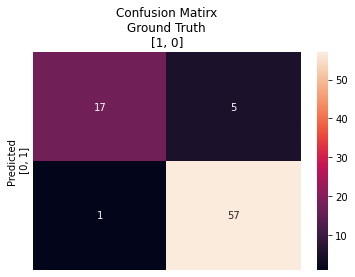

In [17]:
cm = confusion_matrix(y_test, y_pred, labels = [1, 0])

fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
plt.show()

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
df = pd.read_csv(data_path + 'titanic.csv')

In [20]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
5,0,3,NaN,0,0,8.4583,Q
6,0,1,54.0,0,0,51.8625,S
7,0,3,2.0,3,1,21.0750,S
8,1,3,27.0,0,2,11.1333,S
9,1,2,14.0,1,0,30.0708,C


In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# 결측치 채우기
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.000000,1,0,7.2500,S
1,1,1,38.000000,1,0,71.2833,C
2,1,3,26.000000,0,0,7.9250,S
3,1,1,35.000000,1,0,53.1000,S
4,0,3,35.000000,0,0,8.0500,S
5,0,3,29.699118,0,0,8.4583,Q
6,0,1,54.000000,0,0,51.8625,S
7,0,3,2.000000,3,1,21.0750,S
8,1,3,27.000000,0,2,11.1333,S
9,1,2,14.000000,1,0,30.0708,C


In [25]:
# one-hot-encoding
df = pd.get_dummies(df)
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0
6,0,1,54.000000,0,0,51.8625,0,0,1
7,0,3,2.000000,3,1,21.0750,0,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,0


In [26]:
y = df['Survived']
X = df.iloc[:, 1:]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
clf = RandomForestClassifier(n_estimators = 10, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [31]:
print(accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred), '\n', 
      confusion_matrix(y_test, y_pred))

0.7206703910614525 0.5797101449275363 0.6557377049180327 0.6153846153846154 
 [[89 21]
 [29 40]]


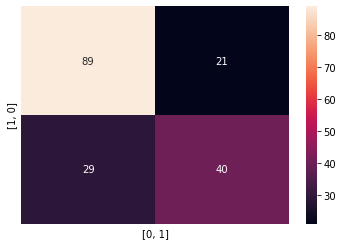

In [34]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot = True)
ax.set_xlabel('[0, 1]')
ax.set_ylabel('[1, 0]')
plt.xticks([])
plt.yticks([])

plt.show()